In [61]:
import os
import re
import ast
from collections import namedtuple

Parameters = namedtuple('ExperimentParameters', ['D', 'W', 'k', 'presence_threshold'])

result_file_name_format = re.compile(r'K(\d+)W(\d+)D(\d+)T(\d+)')
result_files = list(filter(lambda file_name: result_file_name_format.match(file_name), os.listdir()))

results = []
for file in result_files:
    k = int(result_file_name_format.match(file).group(1))
    W = int(result_file_name_format.match(file).group(2))
    D = int(result_file_name_format.match(file).group(3))
    presence_threshold = int(result_file_name_format.match(file).group(4))
    parameters = Parameters(D, W, k, presence_threshold)
    with open(file, 'r') as results_file:
        lines = results_file.readlines()
        navigation_results = ast.literal_eval(lines[0])
        false_positives = int(lines[1])
        false_negatives = int(lines[2])
        results.append({
            'W': W,
            'D': D,
            'k': k,
            'presence_threshold': presence_threshold,
            'navigation_results': navigation_results,
            'false_positives': false_positives,
            'false_positive_rate': false_positives / len(navigation_results),
            'false_negatives': false_negatives
            })

In [62]:
import pandas as pd

df = pd.DataFrame(results).sort_values(by=['W', 'D'])

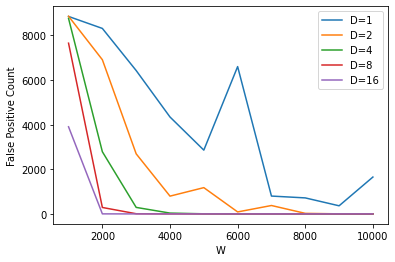

In [63]:
import matplotlib.pyplot as plt

df = df[df['presence_threshold'] == 80]

for D, group in df.groupby('D'):
    plt.plot(group['W'], group['false_positives'], label=f'D={D}')
plt.legend()
plt.xlabel('W')
plt.ylabel('False Positive Count')
plt.show()

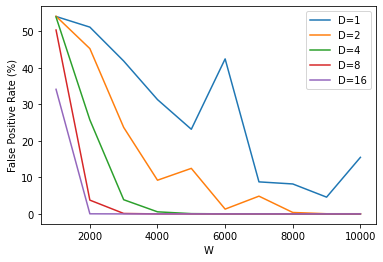

In [64]:
for D, group in df.groupby('D'):
    plt.plot(group['W'], 100*group['false_positive_rate'], label=f'D={D}')
plt.legend()
plt.xlabel('W')
plt.ylabel('False Positive Rate (%)')
plt.show()

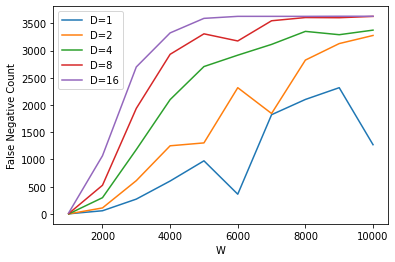

In [65]:
for D, group in df.groupby('D'):
    plt.plot(group['W'], group['false_negatives'], label=f'D={D}')
plt.legend()
plt.xlabel('W')
plt.ylabel('False Negative Count')
plt.show()